# IMPORTING THE LIBRARIES

In [63]:
# Importing Library required for Data Analysis
# Numpy/Pandas :Data Manipulation
# Matplotlib : Data Visualization
# Imputer:For replacing Missing values with mean,median,mode etc
# LabelEncoder/OneHotEncoder : For encoding categorical Variable 
# For splitting data in Train dataset and Test dataset


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,f1_score
from mlxtend.plotting import plot_confusion_matrix
from prettytable import PrettyTable
from sklearn.metrics import precision_recall_fscore_support as score


# Reading the DATASET ( 2011-2016)-1000 Records from each year

In [2]:
#Reading the Dataset Global Terrorism Database (GTD) year(2010-2016) and we will predict the (PERPERTRATOR 1 ) column in this 
# data analysis and will ignore other (PERPERTRATOR 2 and PERPERTRATOR 3 ) columns because they have too much missing values which 
#we will see in the below code..

dataset_1=pd.read_csv('C:/Users/tejve/Downloads/Machine Learning A-Z/Part 10 - Model Selection & Boosting/Section 48 - Model Selection/GTD-Export (10).csv',parse_dates=True,header=0)
dataset_2=pd.read_csv('C:/Users/tejve/Downloads/Machine Learning A-Z/Part 10 - Model Selection & Boosting/Section 48 - Model Selection/GTD-Export (11).csv',parse_dates=True,header=0)
dataset_3=pd.read_csv('C:/Users/tejve/Downloads/Machine Learning A-Z/Part 10 - Model Selection & Boosting/Section 48 - Model Selection/GTD-Export (12).csv',parse_dates=True,header=0)
dataset_4=pd.read_csv('C:/Users/tejve/Downloads/Machine Learning A-Z/Part 10 - Model Selection & Boosting/Section 48 - Model Selection/GTD-Export (13).csv',parse_dates=True,header=0)
dataset_5=pd.read_csv('C:/Users/tejve/Downloads/Machine Learning A-Z/Part 10 - Model Selection & Boosting/Section 48 - Model Selection/GTD-Export (14).csv',parse_dates=True,header=0)
dataset_6=pd.read_csv('C:/Users/tejve/Downloads/Machine Learning A-Z/Part 10 - Model Selection & Boosting/Section 48 - Model Selection/GTD-Export (15).csv',parse_dates=True,header=0)


dataset= pd.concat([dataset_1,dataset_2,dataset_3,dataset_4,dataset_5,dataset_6])
dataset.head()


,GTD ID,DATE,COUNTRY,CITY,PERPETRATOR 1,GUNCERTAIN 1,PERPETRATOR 2,GUNCERTAIN 2,PERPETRATOR 3,GUNCERTAIN 3,...,TARGET TYPE 2,TARGET TYPE 3,REGION,ATTACK TYPE 1,ATTACK TYPE 2,ATTACK TYPE 3,WEAPON TYPE 1,WEAPON TYPE 2,WEAPON TYPE 3,WEAPON TYPE 4
0,2.011120e+11,12/31/2011,Pakistan,Landi Kotal,Unknown,0,2,4,Private Citizens & Property,South Asia,...,Bombing/Explosion,Explosives/Bombs/Dynamite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.011120e+11,12/31/2011,Pakistan,Boya,Tehrik-i-Taliban Pakistan (TTP),1,NaN,NaN,NaN,NaN,...,NaN,NaN,South Asia,Bombing/Explosion,NaN,NaN,Explosives/Bombs/Dynamite,NaN,NaN,NaN
2,2.011120e+11,12/31/2011,Iraq,Kirkuk,Unknown,0,NaN,NaN,NaN,NaN,...,NaN,NaN,Middle East & North Africa,Bombing/Explosion,NaN,NaN,Explosives/Bombs/Dynamite,NaN,NaN,NaN
3,2.011120e+11,12/31/2011,Pakistan,Landi Kotal,Unknown,0,NaN,NaN,NaN,NaN,...,NaN,NaN,South Asia,Bombing/Explosion,NaN,NaN,Explosives/Bombs/Dynamite,NaN,NaN,NaN
4,2.011120e+11,12/31/2011,Iraq,Khan Bani Saad,Al-Qaida in Iraq,1,NaN,NaN,NaN,NaN,...,NaN,NaN,Middle East & North Africa,Armed Assault,NaN,NaN,Firearms,NaN,NaN,NaN


# Remove Duplicates from DataFrame

In [3]:
dataset=dataset.drop_duplicates()
dataset.shape


(5666, 23)

# Data Preprocessing

# 1. Summing the Missing values in The Column

In [4]:
# get the number of missing data points per column this will help us to decide which column we need to drop

print("The number of missing values in each column:")

print(dataset.isnull().sum())

missing_values_count = dataset.isnull().sum()





The number of missing values in each column:
GTD ID              0
DATE                0
COUNTRY             0
CITY                0
PERPETRATOR 1       0
GUNCERTAIN 1        0
PERPETRATOR 2    5577
GUNCERTAIN 2     5577
PERPETRATOR 3    5638
GUNCERTAIN 3     5638
FATALITIES          6
INJURED            12
TARGET TYPE 1       6
TARGET TYPE 2    5089
TARGET TYPE 3    5620
REGION             12
ATTACK TYPE 1       6
ATTACK TYPE 2    5466
ATTACK TYPE 3    5652
WEAPON TYPE 1      12
WEAPON TYPE 2    5194
WEAPON TYPE 3    5596
WEAPON TYPE 4    5662
dtype: int64


# 2. Calculating the % of missing entries in the Dataset

In [5]:
# how many total missing values do we have?
total_cells = np.product(dataset.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing and about 50% of the data is missing we need to see if we can remove those columns
print ("The percent of data that is missing",(total_missing/total_cells) * 100,"%",sep="")

The percent of data that is missing46.62671311714421%


# 3. Remove the Columns which have maximum missing values 

In [6]:
#Drop all the irrelevant columns along with those columns which have maximum missing values 
#All the below columns have too much missing values so I am removing those and We also cannot predict those because they cannot have a actual value and it has to be strictly missing
#The  'City' columns does not have missing value but still I will be removing it because it has too many levels and it is Highly correlated with 'Country' Column.So I am removing 'City' Column also.


dataset=dataset.drop(['REGION','CITY','GTD ID','GUNCERTAIN 1','PERPETRATOR 2','GUNCERTAIN 2','PERPETRATOR 3','GUNCERTAIN 3','TARGET TYPE 2','TARGET TYPE 3','ATTACK TYPE 2','ATTACK TYPE 3','WEAPON TYPE 2','WEAPON TYPE 3','WEAPON TYPE 4'],axis=1)

# 4. ReCalculate the % of missing entries 

In [7]:
# get the number of missing data points per column
missing_values_count = dataset.isnull().sum()

# how many total missing values do we have?
total_cells = np.product(dataset.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing after droping out the variables.
print ("The percent of data that is missing after droping out the variables",total_missing/total_cells*100,"%",sep="")

The percent of data that is missing after droping out the variables0.09265795975997176%


In [8]:
# See Rows and Columns of the dataset
dataset.shape

(5666, 8)

# 5. Columns in Dataset

In [9]:
#Seeing the columns in the dataset
dataset.columns

Index(['DATE', 'COUNTRY', 'PERPETRATOR 1', 'FATALITIES', 'INJURED',
       'TARGET TYPE 1', 'ATTACK TYPE 1', 'WEAPON TYPE 1'],
      dtype='object')

# 6. Remove the "unknown" entries  from the Dataset

In [10]:
#Remove the "Unknown" Entries from the dependent(Predicted variable) variable

dataset=dataset[dataset['PERPETRATOR 1']!='Unknown']


# Removing the "Unknown" entries from the data set in various columns

dataset=dataset[dataset['WEAPON TYPE 1']!='Unknown'] 
dataset=dataset[dataset['ATTACK TYPE 1']!='Unknown']
dataset=dataset[dataset['FATALITIES']!='Unknown']
dataset=dataset[dataset['INJURED']!='Unknown']

In [11]:
dataset.shape

(2184, 8)

# 7. Recheck the total number of missing values per column and Remove the   missing values also if present

In [12]:
#Checking the number of missing entries in the columns
dataset.isnull().sum()

DATE             0
COUNTRY          0
PERPETRATOR 1    0
FATALITIES       3
INJURED          5
TARGET TYPE 1    3
ATTACK TYPE 1    3
WEAPON TYPE 1    5
dtype: int64

In [13]:
#Remove the missing Entries from the dataset in respective rows
dataset=dataset.dropna()

In [14]:
dataset.head()

,DATE,COUNTRY,PERPETRATOR 1,FATALITIES,INJURED,TARGET TYPE 1,ATTACK TYPE 1,WEAPON TYPE 1
4,12/31/2011,Iraq,Al-Qaida in Iraq,5,0,Terrorists/Non-state Militia,Armed Assault,Firearms
7,12/30/2011,Chile,Arauco Malleco Coordinating Group (CAM) - Chile,0,0,Government (General),Facility/Infrastructure Attack,Incendiary
11,12/30/2011,Pakistan,Baloch Liberation Army (BLA),14,30,Government (General),Bombing/Explosion,Explosives/Bombs/Dynamite
15,12/30/2011,Afghanistan,Taliban,4,1,Private Citizens & Property,Bombing/Explosion,Explosives/Bombs/Dynamite
16,12/30/2011,Pakistan,Lashkar-e-Islam (Pakistan),0,0,Educational Institution,Bombing/Explosion,Explosives/Bombs/Dynamite


# Checking if the Data Set has missing Values

In [15]:
#Checking the number of missing entries in the columns
dataset.isnull().sum()


DATE             0
COUNTRY          0
PERPETRATOR 1    0
FATALITIES       0
INJURED          0
TARGET TYPE 1    0
ATTACK TYPE 1    0
WEAPON TYPE 1    0
dtype: int64

# Extracting the Date Column from the Dataset and thn extract the years from that

In [16]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'],format='%m/%d/%Y', errors='coerce')

dataset['year'] = dataset['DATE'].dt.year

#Checking the number of missing entries in the columns

dataset.isnull().sum()


DATE             6
COUNTRY          0
PERPETRATOR 1    0
FATALITIES       0
INJURED          0
TARGET TYPE 1    0
ATTACK TYPE 1    0
WEAPON TYPE 1    0
year             6
dtype: int64

# Create the Copy of the Dataset and remove the 'NA' Enteries /This Modified data set will be used Data Exploration

In [17]:
#Remove the missing Entries from the dataset in respective rows
Data_Exploration=dataset.copy()
Data_Exploration=Data_Exploration.dropna()
Data_Exploration.year.dtype


del dataset['DATE']
del dataset['year']



In [18]:
Data_Exploration.loc[:,'year']=Data_Exploration.year.astype(int)


# Data Exploration

# The Country where maximum terrorist Attack occurs?

# The "Afghanistan" is a place where maximum terrorist Attack occurs

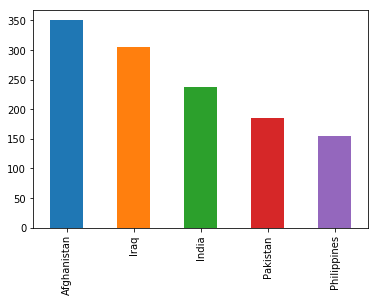

In [19]:
# Plotting the Histogram of the variable (COUNTRY)


Data_Exploration['COUNTRY'].value_counts()[0:5].plot(kind='bar')

# The 'Year' Corresponding to maximum and Minimum Attacks?

# The most attacks occurs in 2015
# The least attacks occurs in 2013

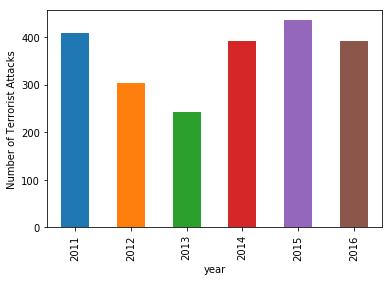

In [20]:

g1 = Data_Exploration.groupby( [ "year"] ).count()['COUNTRY']
plt.ylabel("Number of Terrorist Attacks")
g1.plot(kind='bar')


# Which Group causes the maximum Terrorist Attacks?

#  The perpertrator group "Taliban" which causes maximum terrorist Attack 



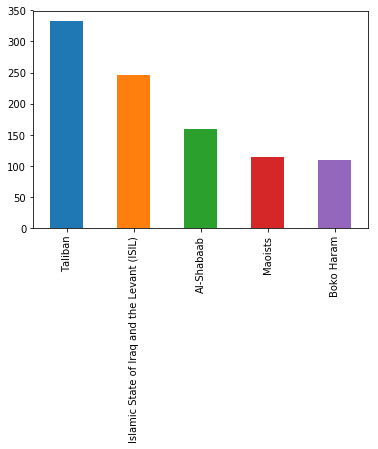

In [21]:
#Following is the perpertrator group "Islamic State of Iraq and the Levant (ISIL)" which causes maximum terrorist Attack /Taliban is 2nd Highest

dataset['PERPETRATOR 1'].value_counts()[0:5].plot(kind='bar')

# Which type of Attack is most common?

# The type of attack which is most common is "Bombing/Explosion"

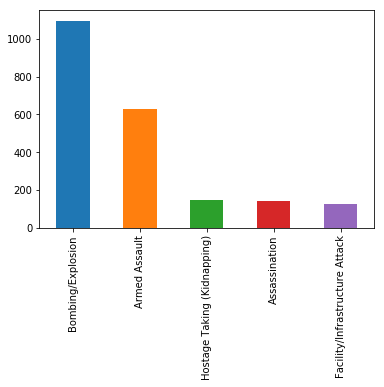

In [22]:
# The type of attack which is most common is "Bombing/Explosion"

dataset['ATTACK TYPE 1'].value_counts()[0:5].plot(kind='bar')

# Which is the most common weapons used in the attacks?

#  The most common weapons used in the attack are Explosives/Bombs/Dynamite

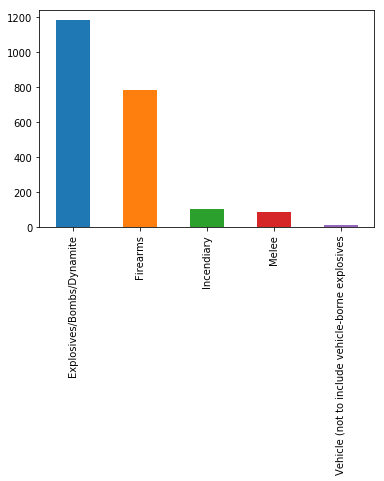

In [23]:
# The most common weapons used in the attack are Explosives/Bombs/Dynamite 

dataset['WEAPON TYPE 1'].value_counts()[0:5].plot(kind='bar')

# Who is the most common target in terrorist Attacks?

# The most common Target in the terrorist attacks are "Private Citizens & Propery"

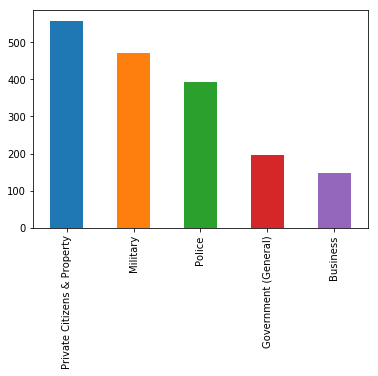

In [24]:
#The most common Target in the terrorist attacks are "Private Citizens & Propery"

dataset['TARGET TYPE 1'].value_counts()[0:5].plot(kind='bar')

# Data processing before Applying Machine Learning Algorithm

# 1. Dividing the data into (Variable to be predicted) Dependent  (Perpertator) and Independent Variable(other Predicators)

# Predicators ( Independent Variables)

## A.COUNTRY
## B.FATALITIES
## C.INJURED
## D.TARGET TYPE 1
## E.ATTACK TYPE 1
## F.WEAPON TYPE 1



In [25]:


X=dataset.iloc[:,[0,2,3,4,5,6]].values


## Dependent Variable (Variable to be Predicted) -PERPETRATOR 1

In [26]:
Y=dataset.iloc[:,1].values
Y.dtype

dtype('O')

# 2. Encoding the (Nominal) Categorical Variable using LabelEncoder and OneHotEncoder  

In [27]:
labelencoder_X=LabelEncoder()

X[:,0]=labelencoder_X.fit_transform(X[:,0])
X[:,3]=labelencoder_X.fit_transform(X[:,3])
X[:,4]=labelencoder_X.fit_transform(X[:,4])
X[:,5]=labelencoder_X.fit_transform(X[:,5])




onehotencoder= OneHotEncoder(categorical_features=[0,3,4,5])
X=onehotencoder.fit_transform(X).toarray()


In [28]:
X.shape

(2179, 101)

In [29]:
Y

array(['Al-Qaida in Iraq',
       'Arauco Malleco Coordinating Group (CAM) - Chile',
       'Baloch Liberation Army (BLA)', ...,
       "Kurdistan Workers' Party (PKK)", 'Maute Group',
       'Jihadi-inspired extremists'], dtype=object)

In [30]:
labelencoder_X=LabelEncoder()

Y=labelencoder_X.fit_transform(Y)


In [31]:
Y.shape

(2179,)

# Split the Data into Train and Test ,then Fit the model

In [32]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Applying Machine Learning Algorithm and We will run Cross Validation for calculating the effictivness of Model and there are many levels in the dependent variable (the variable to be predicted) , which are having only 1 observation in our data set or less than 10 observation So Cross Validation is not a best method but it give us the general Idea

# Support Vector Machines (Multi_class)

In [33]:
from sklearn.svm import LinearSVC
classifier=LinearSVC(random_state=0,multi_class='crammer_singer' )
classifier.fit(X1_train,Y1_train)
y_pred=classifier.predict(X1_test)
y_train=classifier.predict(X1_train)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y1_test,y_pred,)

print("Confusion Matrix :")
print(cm)

table=PrettyTable(['Support Vector Machine kernel(Linear)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)


Confusion Matrix :
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
+---------------------------------------+------------+
| Support Vector Machine kernel(Linear) | Accuracy % |
+---------------------------------------+------------+
|             Training Data             |   79.86    |
|               Test Data               |   67.66    |
+---------------------------------------+------------+


# Cross-Validation on Training Data (We will see error below due to unbalance predicted variables we will solve this later in notebook)

In [34]:
from sklearn.cross_validation import cross_val_score

table = PrettyTable(['Number of Folds','Accuracy %'])
for i in range(5):
     
      accuracies=cross_val_score(estimator=classifier,X=X1_train,y=Y1_train,cv=i+2)
      table.add_row([i+2,round(accuracies.mean()*100,2)])
        
print(table)


C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=2.
  % (min_labels, self.n_folds)), Warning)
C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=4.
  % (min_labels, self.n_folds)), Warning)
C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in 

+-----------------+------------+
| Number of Folds | Accuracy % |
+-----------------+------------+
|        2        |   63.28    |
|        3        |   65.66    |
|        4        |   66.37    |
|        5        |   68.18    |
|        6        |   68.12    |
+-----------------+------------+


# Support Vector Machines (Kernel: 'rbf')

In [35]:
from sklearn.svm import SVC
classifier=SVC(random_state=0,decision_function_shape='ovr',kernel='rbf')
classifier.fit(X1_train,Y1_train)
y_pred=classifier.predict(X1_test)
y_train=classifier.predict(X1_train)
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y1_test,y_pred,)

print("Confusion Matrix :")
print(cm)

table=PrettyTable(['Support Vector Machine kernel(RBF)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)


Confusion Matrix :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
+------------------------------------+------------+
| Support Vector Machine kernel(RBF) | Accuracy % |
+------------------------------------+------------+
|           Training Data            |   52.67    |
|             Test Data              |   50.23    |
+------------------------------------+------------+


# Support Vector Machines (Kernel: 'poly')

In [36]:
from sklearn.svm import SVC
classifier=SVC(random_state=0,kernel='poly')
classifier.fit(X1_train,Y1_train)
y_pred=classifier.predict(X1_test)
y_train=classifier.predict(X1_train)
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y1_test,y_pred,)

print("Confusion Matrix :")
print(cm)

table=PrettyTable(['Support Vector Machine kernel(Poly)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)


Confusion Matrix :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
+-------------------------------------+------------+
| Support Vector Machine kernel(Poly) | Accuracy % |
+-------------------------------------+------------+
|            Training Data            |   24.56    |
|              Test Data              |   20.87    |
+-------------------------------------+------------+


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
classifier.fit(X1_train,Y1_train)

y_pred=classifier.predict(X1_test)
y_train=classifier.predict(X1_train)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y1_test,y_pred)

print("Confusion Matrix :")
print(cm)

table=PrettyTable(['Logistic Regression(Multinominal)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)


Confusion Matrix :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
+-----------------------------------+------------+
| Logistic Regression(Multinominal) | Accuracy % |
+-----------------------------------+------------+
|           Training Data           |   74.47    |
|             Test Data             |   67.89    |
+-----------------------------------+------------+


# Cross-Validation- Logistic Regression

In [38]:
from sklearn.cross_validation import cross_val_score

table = PrettyTable(['Number of Folds','Accuracy %'])
for i in range(5):
     
      accuracies=cross_val_score(estimator=classifier,X=X1_train,y=Y1_train,cv=i+2)
      table.add_row([i+2,round(accuracies.mean()*100,2)])
        
print(table)


C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=2.
  % (min_labels, self.n_folds)), Warning)
C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=4.
  % (min_labels, self.n_folds)), Warning)
C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in 

+-----------------+------------+
| Number of Folds | Accuracy % |
+-----------------+------------+
|        2        |   65.36    |
|        3        |   65.82    |
|        4        |    67.4    |
|        5        |   67.84    |
|        6        |   67.86    |
+-----------------+------------+


#  3. The Variable to be predicted (dependent variable) is a imbalance class as certain classes have higher proportion in the Dataset and We will solve this problem below and increase accuracy of our prediction.

In [39]:
table=PrettyTable(['Predited(dependent Variable)','Number of instances'])

for i in range(len(dataset['PERPETRATOR 1'].value_counts())):
    table.add_row([dataset['PERPETRATOR 1'].value_counts().index.tolist()[i],dataset['PERPETRATOR 1'].value_counts().values[i]])
print(table)    


+-------------------------------------------------------------------------------------------------+---------------------+
|                                   Predited(dependent Variable)                                  | Number of instances |
+-------------------------------------------------------------------------------------------------+---------------------+
|                                             Taliban                                             |         333         |
|                           Islamic State of Iraq and the Levant (ISIL)                           |         246         |
|                                            Al-Shabaab                                           |         159         |
|                                             Maoists                                             |         114         |
|                                            Boko Haram                                           |         110         |
|                       

# Decode the value of topmost  Perpetrator having total count atleast 50

In [40]:
Top_Perpertator=[]
for i in range(len(dataset['PERPETRATOR 1'].value_counts())):
               
      if(dataset['PERPETRATOR 1'].value_counts().values[i]>50):
               
                    Top_Perpertator.append(dataset['PERPETRATOR 1'].value_counts().index.tolist()[i])

cat_list =list(dataset.iloc[:,1].values)
encoded_data, mapping_index = pd.Series(cat_list).factorize()

Perpertaor_coding=[]
for i in range(len(Top_Perpertator)):
    Perpertaor_coding.append(mapping_index.get_loc(Top_Perpertator[i]))


# Combine the independent and dependent variables after encoding the categorical variables

In [41]:
Whole_dataset=np.column_stack((X,np.array(encoded_data)))


In [42]:
Whole_dataset.shape


(2179, 102)

# Remove the problem of Imbalance dataset by splitting the training and test data for that particular class 

In [43]:
dataset_Reduced_1=Whole_dataset[(Whole_dataset[:,-1]==Perpertaor_coding[0])]

X1=dataset_Reduced_1[:,0:Whole_dataset.shape[1]-1]
Y1=dataset_Reduced_1[:,Whole_dataset.shape[1]-1]
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=0)
        

In [44]:


for i in range(len(Top_Perpertator)-1):
            dataset_Reduced_1=Whole_dataset[(Whole_dataset[:,-1]==Perpertaor_coding[i+1])]

            X1=dataset_Reduced_1[:,0:Whole_dataset.shape[1]-1]
            Y1=dataset_Reduced_1[:,Whole_dataset.shape[1]-1]
            X2_train,X2_test,Y2_train,Y2_test=train_test_split(X1,Y1,test_size=0.2,random_state=0)
            X1_train= np.concatenate((X1_train,X2_train),axis=0)
            Y1_train= np.concatenate((Y1_train,Y2_train),axis=0)
            X1_test= np.concatenate((X1_test,X2_test),axis=0)
            Y1_test= np.concatenate((Y1_test,Y2_test),axis=0)


# Making all the other classes =0 (others)-Feature Engineering

In [45]:
Whole_dataset=pd.DataFrame(data=Whole_dataset)
Whole_dataset=Whole_dataset[~(Whole_dataset.iloc[:,101].isin(Perpertaor_coding))].copy()
Whole_dataset.iloc[:,101]=0

X1=Whole_dataset.iloc[:,0:Whole_dataset.shape[1]-1]
Y1=Whole_dataset.iloc[:,Whole_dataset.shape[1]-1]
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X1,Y1,test_size=0.2,random_state=0)
X1_train= np.concatenate((X1_train,X2_train),axis=0)
Y1_train= np.concatenate((Y1_train,Y2_train),axis=0)
X1_test= np.concatenate((X1_test,X2_test),axis=0)
Y1_test= np.concatenate((Y1_test,Y2_test),axis=0)

# We will do Feature Scaling so that we can predict things Appropriately


In [46]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

Sc_X=StandardScaler()
X1_train=Sc_X.fit_transform(X1_train)
X1_test=Sc_X.transform(X1_test)

# Apply Machine Learning Classification Algorithm

# 1. Support Vector Machine (Using Kernel='Linear')

In [47]:
from sklearn.svm import LinearSVC
classifier=LinearSVC(random_state=0,multi_class='crammer_singer' )

In [48]:
classifier.fit(X1_train,Y1_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=0,
     tol=0.0001, verbose=0)

In [49]:
y_pred=classifier.predict(X1_test)

Y_train=classifier.predict(X1_train)

Confusion Matrix :


<Figure size 432x288 with 0 Axes>

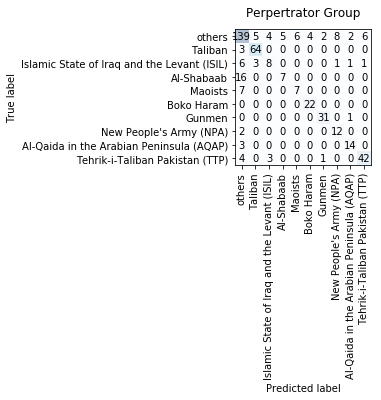

In [50]:
#Making the Confusion Matrix


from sklearn.metrics import confusion_matrix

labels = ['others']
for i in range(len(Top_Perpertator)):
    labels.append(Top_Perpertator[i])

cm=confusion_matrix(Y1_test,y_pred)

print("Confusion Matrix :")

plt.clf()

fig, ax = plot_confusion_matrix(conf_mat=cm)
classNames =labels
plt.title('Perpertrator Group')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.show()

In [51]:
table=PrettyTable(['Support Vector Machine kernel(Linear)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, Y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)

precision, recall, fscore, support = score(Y1_test, y_pred)
table = PrettyTable(['labels','Precision','Recall','Fscore'])
for i in range(len(labels)):
    table.add_row([labels[i],round(precision[i],2),round(recall[i],2),round(fscore[i],2)])
print(table)



+---------------------------------------+------------+
| Support Vector Machine kernel(Linear) | Accuracy % |
+---------------------------------------+------------+
|             Training Data             |   84.59    |
|               Test Data               |   78.64    |
+---------------------------------------+------------+
+---------------------------------------------+-----------+--------+--------+
|                    labels                   | Precision | Recall | Fscore |
+---------------------------------------------+-----------+--------+--------+
|                    others                   |    0.77   |  0.77  |  0.77  |
|                   Taliban                   |    0.89   |  0.96  |  0.92  |
| Islamic State of Iraq and the Levant (ISIL) |    0.53   |  0.4   |  0.46  |
|                  Al-Shabaab                 |    0.58   |  0.3   |  0.4   |
|                   Maoists                   |    0.54   |  0.5   |  0.52  |
|                  Boko Haram                 

# Evaluating the Effectivness of Model - Cross_Validation

In [52]:
from sklearn.cross_validation import cross_val_score

table = PrettyTable(['Number of Folds','Accuracy %'])
for i in range(5):
     
      accuracies=cross_val_score(estimator=classifier,X=X1_train,y=Y1_train,cv=i+2)
      table.add_row([i+2,round(accuracies.mean()*100,2)])
        
print(table)


+-----------------+------------+
| Number of Folds | Accuracy % |
+-----------------+------------+
|        2        |   76.02    |
|        3        |   76.54    |
|        4        |   78.03    |
|        5        |   77.46    |
|        6        |    77.7    |
+-----------------+------------+


# By using Kernel='rbf'

Confusion Matrix :


<Figure size 432x288 with 0 Axes>

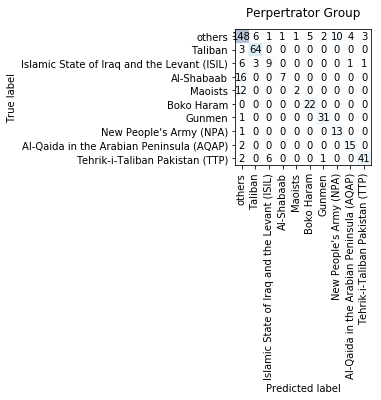

In [53]:
#Applying the Kernel='rbf'

from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X1_train,Y1_train)
y_pred=classifier.predict(X1_test)
Y_train=classifier.predict(X1_train)

#Making the Confusion Matrix


from sklearn.metrics import confusion_matrix

labels = ['others']
for i in range(len(Top_Perpertator)):
    labels.append(Top_Perpertator[i])

cm=confusion_matrix(Y1_test,y_pred)

print("Confusion Matrix :")

plt.clf()

fig, ax = plot_confusion_matrix(conf_mat=cm)
classNames =labels
plt.title('Perpertrator Group')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.show()

In [54]:
table=PrettyTable(['Support Vector Machine kernel(rbf)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, Y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)

precision, recall, fscore, support = score(Y1_test, y_pred)
table = PrettyTable(['labels','Precision','Recall','Fscore'])
for i in range(len(labels)):
    table.add_row([labels[i],round(precision[i],2),round(recall[i],2),round(fscore[i],2)])
print(table)



+------------------------------------+------------+
| Support Vector Machine kernel(rbf) | Accuracy % |
+------------------------------------+------------+
|           Training Data            |   82.29    |
|             Test Data              |    80.0    |
+------------------------------------+------------+
+---------------------------------------------+-----------+--------+--------+
|                    labels                   | Precision | Recall | Fscore |
+---------------------------------------------+-----------+--------+--------+
|                    others                   |    0.77   |  0.82  |  0.8   |
|                   Taliban                   |    0.88   |  0.96  |  0.91  |
| Islamic State of Iraq and the Levant (ISIL) |    0.56   |  0.45  |  0.5   |
|                  Al-Shabaab                 |    0.88   |  0.3   |  0.45  |
|                   Maoists                   |    0.67   |  0.14  |  0.24  |
|                  Boko Haram                 |    0.81   |  1.0

# Evaluating the Effectivness of Model (Cross Validation)

In [55]:
from sklearn.cross_validation import cross_val_score

table = PrettyTable(['Number of Folds','Accuracy %'])
for i in range(5):
     
      accuracies=cross_val_score(estimator=classifier,X=X1_train,y=Y1_train,cv=i+2)
      table.add_row([i+2,round(accuracies.mean()*100,2)])
        
print(table)


+-----------------+------------+
| Number of Folds | Accuracy % |
+-----------------+------------+
|        2        |   77.23    |
|        3        |    78.1    |
|        4        |    78.9    |
|        5        |   78.56    |
|        6        |   78.68    |
+-----------------+------------+


# Applying the Kernel='poly'

Confusion Matrix :


<Figure size 432x288 with 0 Axes>

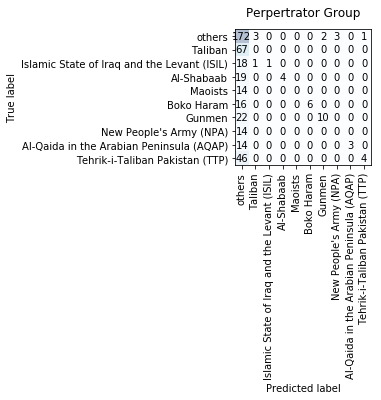

In [56]:
#Applying the Kernel='poly'

from sklearn.svm import SVC
classifier=SVC(kernel='poly',random_state=0)
classifier.fit(X1_train,Y1_train)
y_pred=classifier.predict(X1_test)
Y_train=classifier.predict(X1_train)

#Making the Confusion Matrix


from sklearn.metrics import confusion_matrix

labels = ['others']
for i in range(len(Top_Perpertator)):
    labels.append(Top_Perpertator[i])

cm=confusion_matrix(Y1_test,y_pred)

print("Confusion Matrix :")

plt.clf()

fig, ax = plot_confusion_matrix(conf_mat=cm)
classNames =labels
plt.title('Perpertrator Group')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.show()

In [57]:
table=PrettyTable(['Support Vector Machine kernel(Poly)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, Y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)


precision, recall, fscore, support = score(Y1_test, y_pred)
table = PrettyTable(['labels','Precision','Recall','Fscore'])
for i in range(len(labels)):
    table.add_row([labels[i],round(precision[i],2),round(recall[i],2),round(fscore[i],2)])
print(table)



+-------------------------------------+------------+
| Support Vector Machine kernel(Poly) | Accuracy % |
+-------------------------------------+------------+
|            Training Data            |   52.62    |
|              Test Data              |   45.45    |
+-------------------------------------+------------+
+---------------------------------------------+-----------+--------+--------+
|                    labels                   | Precision | Recall | Fscore |
+---------------------------------------------+-----------+--------+--------+
|                    others                   |    0.43   |  0.95  |  0.59  |
|                   Taliban                   |    0.0    |  0.0   |  0.0   |
| Islamic State of Iraq and the Levant (ISIL) |    1.0    |  0.05  |  0.1   |
|                  Al-Shabaab                 |    1.0    |  0.17  |  0.3   |
|                   Maoists                   |    0.0    |  0.0   |  0.0   |
|                  Boko Haram                 |    1.0    

C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Applying the Kernel='sigmoid'

Confusion Matrix :


<Figure size 432x288 with 0 Axes>

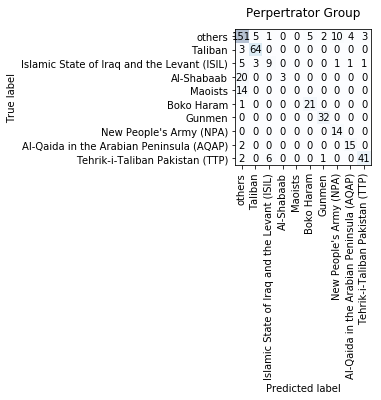

In [58]:
#Applying the Kernel='sigmoid'

from sklearn.svm import SVC
classifier=SVC(kernel='sigmoid',random_state=0)
classifier.fit(X1_train,Y1_train)
y_pred=classifier.predict(X1_test)
Y_train=classifier.predict(X1_train)

#Making the Confusion Matrix


from sklearn.metrics import confusion_matrix

labels = ['others']
for i in range(len(Top_Perpertator)):
    labels.append(Top_Perpertator[i])

cm=confusion_matrix(Y1_test,y_pred)

print("Confusion Matrix :")

plt.clf()

fig, ax = plot_confusion_matrix(conf_mat=cm)
classNames =labels
plt.title('Perpertrator Group')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.show()


In [59]:
table=PrettyTable(['Support Vector Machine Kernel (Sigmoid)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, Y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)


precision, recall, fscore, support = score(Y1_test, y_pred)
table = PrettyTable(['labels','Precision','Recall','Fscore'])
for i in range(len(labels)):
    table.add_row([labels[i],round(precision[i],2),round(recall[i],2),round(fscore[i],2)])
print(table)



+-----------------------------------------+------------+
| Support Vector Machine Kernel (Sigmoid) | Accuracy % |
+-----------------------------------------+------------+
|              Training Data              |   79.64    |
|                Test Data                |   79.55    |
+-----------------------------------------+------------+
+---------------------------------------------+-----------+--------+--------+
|                    labels                   | Precision | Recall | Fscore |
+---------------------------------------------+-----------+--------+--------+
|                    others                   |    0.76   |  0.83  |  0.8   |
|                   Taliban                   |    0.89   |  0.96  |  0.92  |
| Islamic State of Iraq and the Levant (ISIL) |    0.56   |  0.45  |  0.5   |
|                  Al-Shabaab                 |    1.0    |  0.13  |  0.23  |
|                   Maoists                   |    0.0    |  0.0   |  0.0   |
|                  Boko Haram     

C:\Users\tejve\Anaconda2\envs\Python3.6Test\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 2. Logistic Regression

Confusion Matrix :


<Figure size 432x288 with 0 Axes>

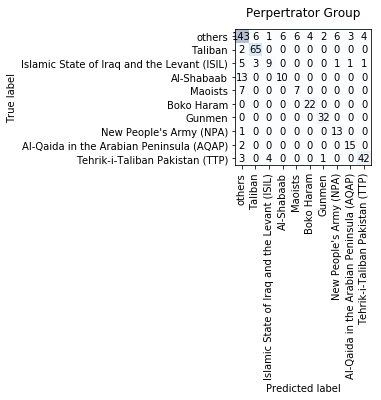

In [60]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
classifier.fit(X1_train,Y1_train)

y_pred=classifier.predict(X1_test)
y_train=classifier.predict(X1_train)



from sklearn.metrics import confusion_matrix

labels = ['others']
for i in range(len(Top_Perpertator)):
    labels.append(Top_Perpertator[i])

cm=confusion_matrix(Y1_test,y_pred)

print("Confusion Matrix :")

plt.clf()
fig, ax = plot_confusion_matrix(conf_mat=cm)
classNames =labels
plt.title('Perpertrator Group')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.show()

In [61]:
table=PrettyTable(['Logistic Regression (Multinominal)','Accuracy %'])
table.add_row(['Training Data',round(accuracy_score(Y1_train, Y_train)*100,2)])
table.add_row(['Test Data',round(accuracy_score(Y1_test, y_pred)*100,2)])
print(table)
    



precision, recall, fscore, support = score(Y1_test, y_pred)
table = PrettyTable(['labels','Precision','Recall','Fscore'])
for i in range(len(labels)):
    table.add_row([labels[i],round(precision[i],2),round(recall[i],2),round(fscore[i],2)])
print(table)


+------------------------------------+------------+
| Logistic Regression (Multinominal) | Accuracy % |
+------------------------------------+------------+
|           Training Data            |   79.64    |
|             Test Data              |   81.36    |
+------------------------------------+------------+
+---------------------------------------------+-----------+--------+--------+
|                    labels                   | Precision | Recall | Fscore |
+---------------------------------------------+-----------+--------+--------+
|                    others                   |    0.81   |  0.79  |  0.8   |
|                   Taliban                   |    0.88   |  0.97  |  0.92  |
| Islamic State of Iraq and the Levant (ISIL) |    0.64   |  0.45  |  0.53  |
|                  Al-Shabaab                 |    0.62   |  0.43  |  0.51  |
|                   Maoists                   |    0.54   |  0.5   |  0.52  |
|                  Boko Haram                 |    0.85   |  1.0

# Evaluating the Effectivness of Model (Cross_Validation)

In [62]:
from sklearn.cross_validation import cross_val_score

table = PrettyTable(['Number of Folds','Accuracy %'])
for i in range(5):
     
      accuracies=cross_val_score(estimator=classifier,X=X1_train,y=Y1_train,cv=i+2)
      table.add_row([i+2,round(accuracies.mean()*100,2)])
        
print(table)


+-----------------+------------+
| Number of Folds | Accuracy % |
+-----------------+------------+
|        2        |   79.07    |
|        3        |   79.36    |
|        4        |   80.11    |
|        5        |   79.71    |
|        6        |   80.45    |
+-----------------+------------+
